#  Modelo das urnas de Ehrenfest

Este modelo foi desenvolvido como uma plataforma para testar conceitos-chave da física estatística e campos relacionados. Por exemplo, com tal modelo pode-se ter insights sobre rota irreversível para o equilíbrio termodinâmico e o papel das flutuações nessa rota. 


* P. Ehrenfest and T. Ehrenfest, Phys. Z. 8, 311 (1907)
* Capítulo 6 de Tomé, T., & De Oliveira, M. J. (2015). Stochastic dynamics and irreversibility. Cham: Springer. ISO 690
* Ehrenfest Urn Problem with Applications: http://www.arcaneknowledge.org/science/ehrenfest.html
* Casas, G. A., F. D. Nobre, and E. M. F. Curado. "Nonlinear Ehrenfest's urn model." Physical Review E 91.4 (2015): 042139.
* Clark, Jaime, et al. "Generalization of the Ehrenfest urn model to a complex network." Physical Review E 92.1 (2015): 012103.
* Tseng, Chun-Hsiung, Yee-Mou Kao, and Chi-Ho Cheng. "Ehrenfest urn model with interaction." Physical Review E 96.3 (2017): 032125.



## Regras:
* Temos dois compartimentos (caixas,urnas) com um total de N bolas numeradas de 1 a N.
* Inicialmente algumas destas bolas estão no compartimento 1 e o restante no compartimento 2.
* Em cada experimento selecionamos uma bola ao acaso e a trocamos de compartimento.
* Repita o procedimento sequencialmente


In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
# funcao que devolve a quantidade de vezes
# que o numero x aparece no vetor vec
def ocorrencias(vec, x):
    return float(sum(vec==x))

# inicializacao: ne bolas na esquerda de um total de N
def inicializacao(N, ne):        
    bolas0 = np.zeros( ne, dtype=int)
    bolas1 = np.ones(  N-ne, dtype=int)
    urna_inicial = np.concatenate( (bolas0,bolas1), axis=None)
    #np.random.shuffle(full)    
    return urna_inicial

# funcao para transferencia de 1 bola
def transferenciaDeUmabola(vetor_urna):
    numeroBolas = len(vetor_urna)    
    sorteada    = rd.randint(0,numeroBolas-1)
    
    if vetor_urna[sorteada]==1: vetor_urna[sorteada]=0        
    else: vetor_urna[sorteada]=1
                
    return vetor_urna

In [ ]:
# parametros
N  = 100; 
ne = N; 
tf = 500


# inicializacao
bolaNaUrna = inicializacao(N,ne)

print("t:",0 ,"ne:", ocorrencias(bolaNaUrna, 0), "nd:", ocorrencias(bolaNaUrna, 1) )

# vetores para guardar resultados
vec_ne = [ ocorrencias(bolaNaUrna, 0) ]
vec_nd = [ ocorrencias(bolaNaUrna, 1) ]
vec_eq = [ N/2 ]

print(vec_eq)

# transferencia de bolas durante tf+1 instantes
for t in range(1,tf):
    bolaNaUrna = transferenciaDeUmabola(bolaNaUrna)
    vec_ne.append( ocorrencias(bolaNaUrna, 0) )
    vec_nd.append( ocorrencias(bolaNaUrna, 1) )
    vec_eq.append(N/2)
    

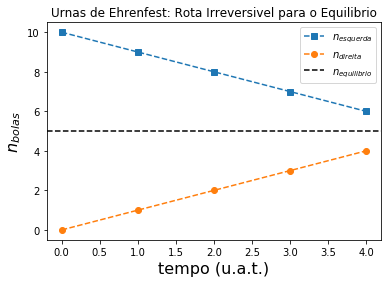

In [6]:
plt.plot(vec_ne,'s',label='$n_{esquerda}$')
plt.plot(vec_nd,'o',label='$n_{direita}$')
plt.ylabel('$n_{bolas}$',fontsize=16)
plt.xlabel('tempo (u.a.t.)',fontsize=16)
plt.title('Urnas de Ehrenfest: Rota Irreversivel para o Equilibrio')
plt.axhline(y=float(N)/2, color='k', linestyle='--',label='$n_{equilibrio}$')
plt.legend()